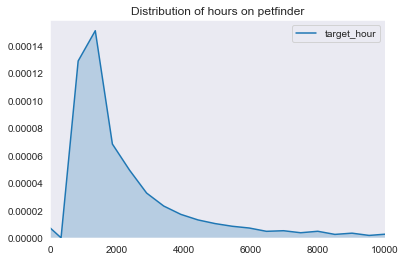

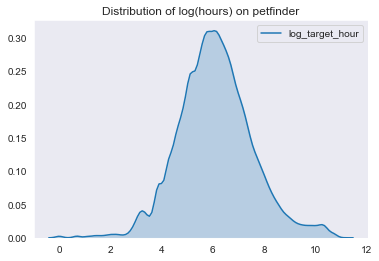

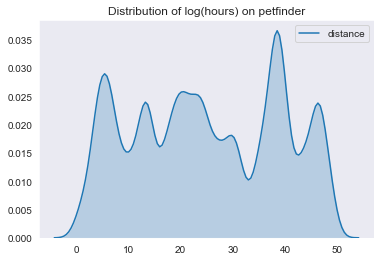

In [20]:
import pandas as pd
import numpy as np

from petdata_functions import CleanPetData
from petdata_functions import ReformatDates


#read in data 
chidat = pd.read_csv("Chicago_adopted_20k_Jan_21.csv") 
chidat['City'] = 'Chicago'

houstdat = pd.read_csv("Houston_adopted_20k_Jan_21.csv") 
houstdat['City'] = 'Houston'

elpdat = pd.read_csv("ElPaso_adopted_20k_Jan_21.csv") 
elpdat['City'] = 'ElPaso'

Minndat = pd.read_csv("Chicago_adopted_20k_Jan_21.csv") 
Minndat['City'] = 'Minne'

dendat = pd.read_csv("Denver_adopted_20k_Jan_21.csv") 
dendat['City'] = 'Denver'

stldat = pd.read_csv("StL_adopted_20k_Jan_21.csv")
stldat['City'] = 'StLouis'

inddat = pd.read_csv("Indy_adopted_20k_Jan_21.csv")
inddat['City'] = 'Indy'

petdat = pd.concat([chidat,houstdat,elpdat,Minndat,dendat, stldat, inddat])


petdat = CleanPetData(petdat)

#petdat = ReformatDates(petdat)
    
fmt ='%Y-%m-%dT%H:%M:%S+0000'
petdat['published_at'] =  pd.to_datetime(petdat['published_at'], format=fmt)
petdat['status_changed_at'] =  pd.to_datetime(petdat['status_changed_at'], format=fmt)
petdat['time_diff'] = petdat['status_changed_at'] - petdat['published_at']
petdat['target_hour'] = petdat.time_diff.astype('timedelta64[h]')
petdat['target_day'] = petdat.time_diff.astype('timedelta64[D]')
    
petdat['log_target_hour'] = np.log(petdat['target_hour'])



#Make some density plots

import matplotlib.pyplot as plt
import seaborn as sns
df = petdat

sns.set_style("dark")
g = sns.kdeplot(df['target_hour'], shade=True)
plt.xlim(left = -2,right=10000)
plt.title("Distribution of hours on petfinder")
plt.show(g)


sns.set_style("dark")
h = sns.kdeplot(df['log_target_hour'], shade=True)
plt.title("Distribution of log(hours) on petfinder")
plt.show(h)


sns.set_style("dark")
h = sns.kdeplot(df['distance'], shade=True)
plt.show(h)





/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Text(0.5, 1, 'environment.dogs')

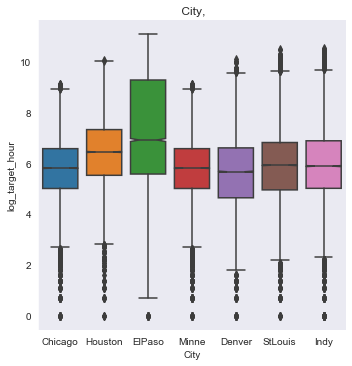

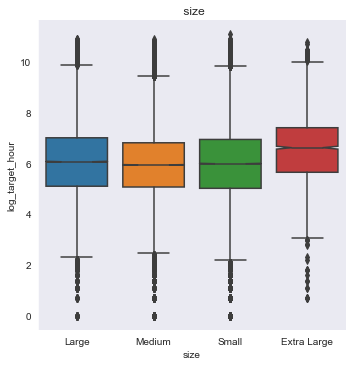

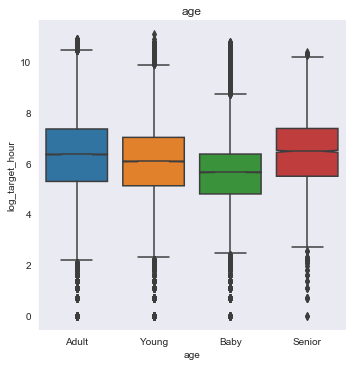

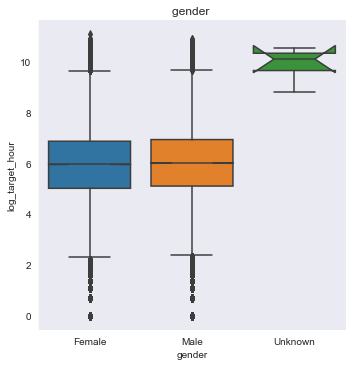

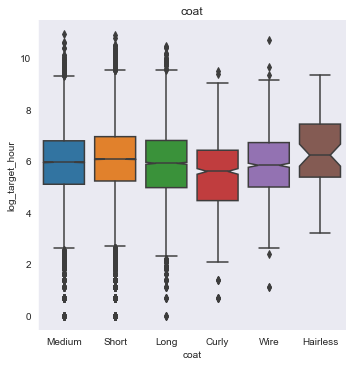

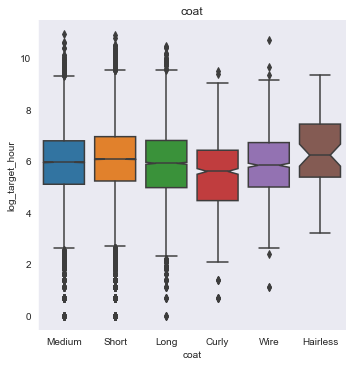

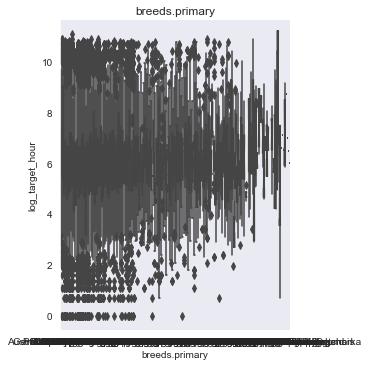

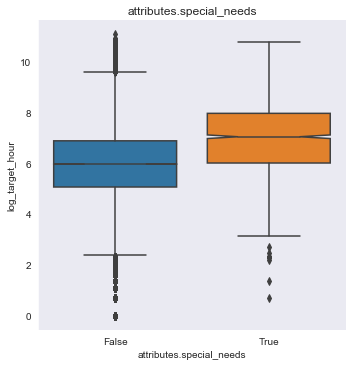

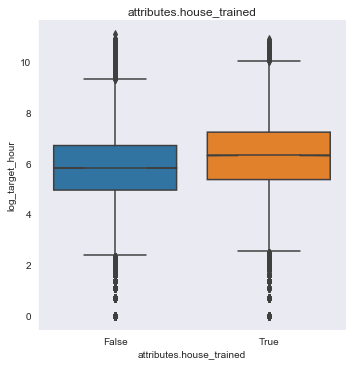

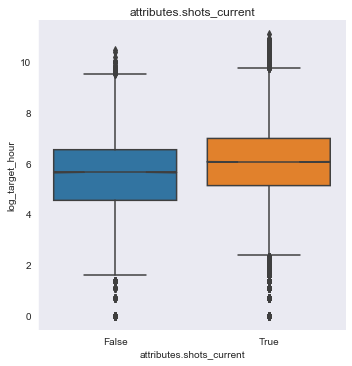

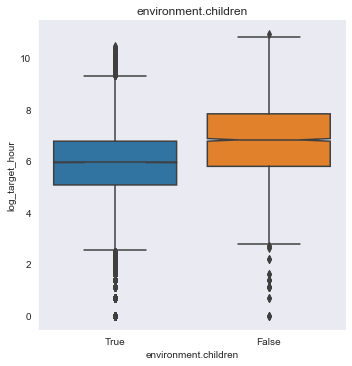

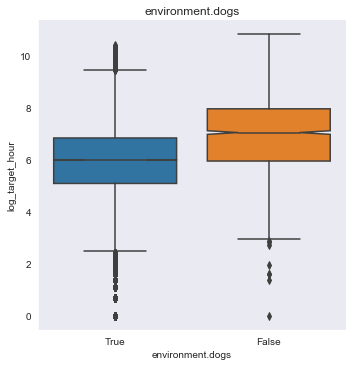

In [21]:

# plot
sns.catplot(x="City", y="log_target_hour", kind="box", notch = True, data=df);
plt.title(" City,")

sns.catplot(x="size", y="log_target_hour", kind="box", notch = True,data=df);
plt.title(" size")

sns.catplot(x="age", y="log_target_hour", kind="box", notch = True,data=df);
plt.title("age")

sns.catplot(x="gender", y="log_target_hour", kind="box", notch = True,data=df);
plt.title("gender ")

sns.catplot(x="coat", y="log_target_hour", kind="box", notch = True,data=df);
plt.title("coat")

sns.catplot(x="coat", y="log_target_hour", kind="box", notch = True,data=df);
plt.title("coat")

sns.catplot(x="breeds.primary", y="log_target_hour", kind="box", notch = True,data=df);
plt.title("breeds.primary")

sns.catplot(x="attributes.special_needs", y="log_target_hour", kind="box", notch = True,data=df);
plt.title("attributes.special_needs")

sns.catplot(x="attributes.house_trained", y="log_target_hour", kind="box", notch = True,data=df);
plt.title("attributes.house_trained")

sns.catplot(x="attributes.shots_current", y="log_target_hour", kind="box", notch = True,data=df);
plt.title("attributes.shots_current")

sns.catplot(x="environment.children", y="log_target_hour", kind="box", notch = True,data=df);
plt.title("environment.children")

sns.catplot(x="environment.dogs", y="log_target_hour", kind="box", notch = True,data=df);
plt.title("environment.dogs")




